# Deep Learning project - IPSI3

In [21]:
# CONSTANTS

DATA_DIR = 'data/flowers/'
TRAIN_DIR = DATA_DIR + 'train'
TEST_DIR = DATA_DIR + 'test'

In [27]:
# IMPORTS

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

## Data import and augmentation

In [23]:
BATCH_SIZE = 16
datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = datagenerator.flow_from_directory(TRAIN_DIR,
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE,
                                          shuffle='true',
                                          color_mode='rgb')

test_generator = datagenerator.flow_from_directory(TEST_DIR,
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          color_mode='rgb'
                                          )

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


## Model creation and training : iteration #1

In [24]:
model = Sequential()
model.add(Conv2D(4,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(len(train_generator.class_indices), activation="softmax"))
opt = SGD(learning_rate=1.0)

EPOCHS = 10
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.0974 - loss: 61.9645 - val_accuracy: 0.1000 - val_loss: 2.3118
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.0707 - loss: 2.3343 - val_accuracy: 0.1000 - val_loss: 2.3085
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.0873 - loss: 2.3253 - val_accuracy: 0.1000 - val_loss: 2.3141
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.1058 - loss: 2.3222 - val_accuracy: 0.1000 - val_loss: 2.3105
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.0934 - loss: 2.3096 - val_accuracy: 0.1000 - val_loss: 2.3176
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.0768 - loss: 2.3225 - val_accuracy: 0.1000 - val_loss: 2.3052
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.0997 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3175
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.1061 - loss: 2.3210 - val_accuracy: 0.1000 - val

# Model creation and training : iteration #2, learning rate adaptation

- First we decrease the learning rate to 0.01 

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.1756 - loss: 2.1927 - val_accuracy: 0.2550 - val_loss: 2.0045
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.3991 - loss: 1.5796 - val_accuracy: 0.2950 - val_loss: 1.8639
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.5332 - loss: 1.3229 - val_accuracy: 0.2900 - val_loss: 1.8501
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6071 - loss: 1.1099 - val_accuracy: 0.3250 - val_loss: 2.0422
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6935 - loss: 0.9111 - val_accuracy: 0.3200 - val_loss: 2.0280
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7880 - loss: 0.7619 - val_accuracy: 0.3450 - val_loss: 2.0155
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8121 - loss: 0.5843 - val_accuracy: 0.3300 - val_loss: 2.0855
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9045 - loss: 0.3724 - val_accuracy: 0.

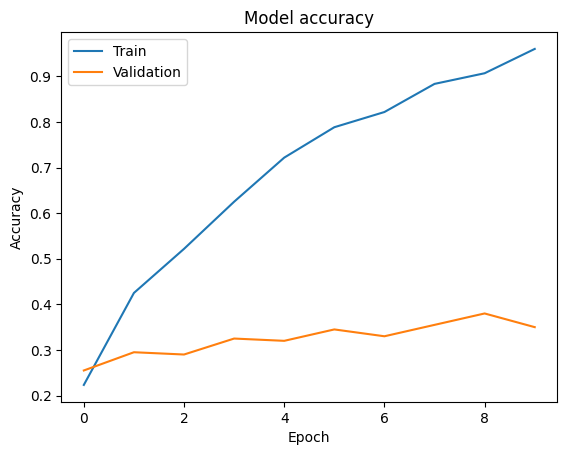

In [25]:
model = Sequential()
model.add(Conv2D(4,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(len(train_generator.class_indices), activation="softmax"))
opt = SGD(learning_rate=0.01)

EPOCHS = 10
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- The curve drawn indicates crearly that the model overfits the training data, resulting in a large gap between the training and validation accuracy curves. 
- Let's add some layers to the model to increase its complexity and see if we can reduce the gap between the training and validation accuracy curves.
    - We resized the first convolutional layer to 64 filters
    - We added a second convolutional layer with 32 filters
    - We added a pooling layer after the second convolutional layer
    - We added a dense layer with 128 neurons

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 570ms/step - accuracy: 0.1064 - loss: 2.3091 - val_accuracy: 0.2150 - val_loss: 2.1093
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 491ms/step - accuracy: 0.3387 - loss: 1.8593 - val_accuracy: 0.3300 - val_loss: 1.9434
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 469ms/step - accuracy: 0.4240 - loss: 1.5857 - val_accuracy: 0.3200 - val_loss: 1.8619
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 469ms/step - accuracy: 0.5434 - loss: 1.2577 - val_accuracy: 0.3800 - val_loss: 1.6437
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 472ms/step - accuracy: 0.5912 - loss: 1.0933 - val_accuracy: 0.3450 - val_loss: 1.7002
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 523ms/step - accuracy: 0.7233 - loss: 0.8630 - val_accuracy: 0.4700 - val_loss: 1.4472
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 467ms/step - accuracy: 0.7438 - loss: 0.7623 - val_accuracy: 0.4350 - val_loss: 1.5553
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 464ms/step - accuracy: 0.8133 - loss: 0.6109 - val_accu

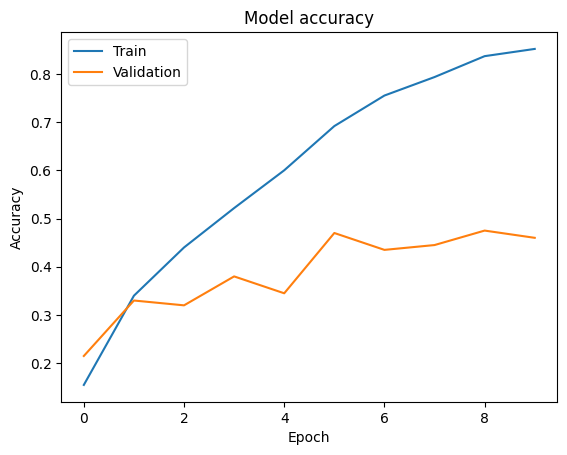

In [26]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation="softmax"))
opt = SGD(learning_rate=0.01)

EPOCHS = 10
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- Following this, we still see an overfitting tendency in the model. We will try to add a dropout layer to reduce this overfitting.

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 615ms/step - accuracy: 0.1732 - loss: 2.3764 - val_accuracy: 0.2600 - val_loss: 2.0765
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 599ms/step - accuracy: 0.3369 - loss: 1.7070 - val_accuracy: 0.3000 - val_loss: 1.9824
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 601ms/step - accuracy: 0.4905 - loss: 1.4740 - val_accuracy: 0.4150 - val_loss: 1.6987
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 605ms/step - accuracy: 0.5998 - loss: 1.1282 - val_accuracy: 0.3600 - val_loss: 1.6780
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 611ms/step - accuracy: 0.6908 - loss: 0.8895 - val_accuracy: 0.3650 - val_loss: 1.6126
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 610ms/step - accuracy: 0.7485 - loss: 0.7690 - val_accuracy: 0.5150 - val_loss: 1.4388
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 603ms/step - accuracy: 0.8004 - loss: 0.6165 - val_accuracy: 0.5300 - val_loss: 1.3866
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 610ms/step - accuracy: 0.8233 - loss: 0.5333 - val_accu

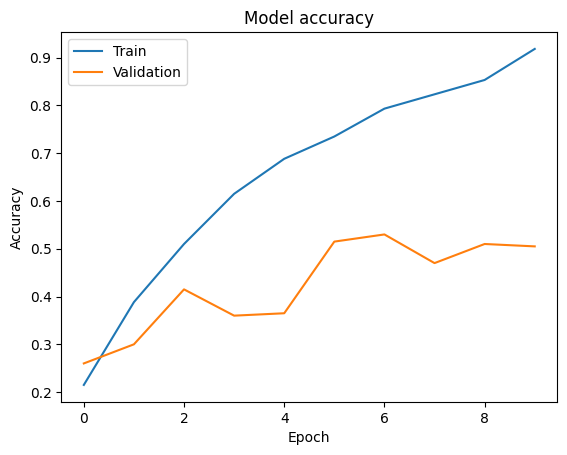

In [29]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation="softmax"))
opt = SGD(learning_rate=0.01)

EPOCHS = 10
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- The dropout does not seem to have a significant impact on the model. We will try to change the SGD optimizer to the Adam optimizer.

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 860ms/step - accuracy: 0.1660 - loss: 7.2243 - val_accuracy: 0.2050 - val_loss: 2.1094
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 917ms/step - accuracy: 0.3980 - loss: 1.6435 - val_accuracy: 0.4200 - val_loss: 1.6771
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 909ms/step - accuracy: 0.6614 - loss: 0.9726 - val_accuracy: 0.4400 - val_loss: 1.5983
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 839ms/step - accuracy: 0.8319 - loss: 0.4829 - val_accuracy: 0.5350 - val_loss: 1.2483
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 853ms/step - accuracy: 0.9596 - loss: 0.1684 - val_accuracy: 0.5000 - val_loss: 1.5928
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 864ms/step - accuracy: 0.9919 - loss: 0.0532 - val_accuracy: 0.6000 - val_loss: 1.3346
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 830ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.6100 - val_loss: 1.3677
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 835ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accu

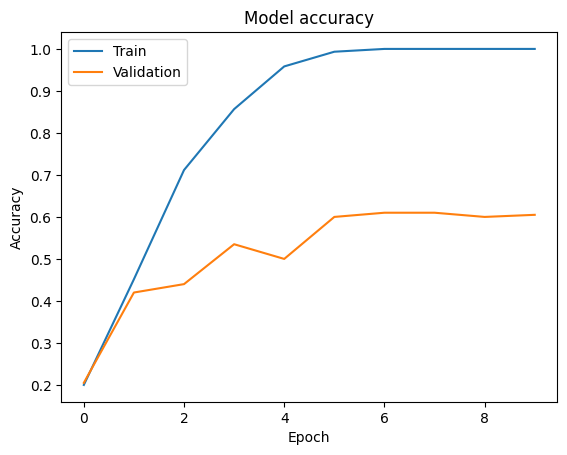

In [30]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation="softmax"))
# Use Adam optimizer
opt = 'adam'

EPOCHS = 10
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()